# <center>Project: Predicting the NBA Most Valuable Player (MVP)</center>

> ### Part I: Web scraping: Basketball stats
This is part 1 of a 3-part series where we predict the NBA MVP. In this session, we'll scrape NBA stats and read them into DataFrames. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
pd.set_option('display.max_columns', 81)

> **1. Scraping most value player from 1991 to 2022**

In [2]:
# scrape most valeu player from 1991 to 2022
years = list(range(1991, 2022))

url_start = "https://www.basketball-reference.com/awards/awards_{}.html"

for year in years:
    url = url_start.format(year)
    data = requests.get(url)
    
    # Save the webpages
    with open("mvp/{}.html".format(year), "w+", encoding="utf-8") as f:
        f.write(data.text)

In [11]:
dfs = []
for year in years:
    with open("mvp/{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    # parsing the webpage with bs4
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="over_header").decompose()
    mvp_table = soup.find(id='mvp')
    mvp = pd.read_html(str(mvp_table))[0]
    mvp['Year'] = year
    
    dfs.append(mvp)

In [12]:
mvps = pd.concat(dfs)
mvps.tail()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
10,11,Russell Westbrook,32,WAS,0.0,5.0,1010,0.005,65,36.4,...,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,2021
11,12,Ben Simmons,24,PHI,0.0,3.0,1010,0.003,58,32.4,...,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,2021
12,13T,James Harden,31,TOT,0.0,1.0,1010,0.001,44,36.6,...,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,2021
13,13T,LeBron James,36,LAL,0.0,1.0,1010,0.001,45,33.4,...,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,2021
14,13T,Kawhi Leonard,29,LAC,0.0,1.0,1010,0.001,52,34.1,...,6.5,5.2,1.6,0.4,0.512,0.398,0.885,8.8,0.238,2021


In [13]:
mvps.to_csv("mvps.csv")

> **2. Scrapign players stats data from 1991 to 2022**

In [37]:
player_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"

In [44]:
for year in years:
       
    driver = webdriver.Chrome(ChromeDriverManager().install())
    #year = 1991
    url = player_stats_url.format(year)
    driver.get(url)
    driver.execute_script('window.scrollTo(1,10000)')
    time.sleep(2)

    html = driver.page_source
    
    with open('player/{}.html'.format(year), "w+", encoding="utf-8") as f:
        f.write(html)



====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [C:\Users\valer\.wdm\drivers\chromedriver\win32\100.0.4896.60\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [C:\Users\valer\.wdm\drivers\chromedriver\win32\100.0.4896.60\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [C:\Users\valer\.wdm\drivers\chromedriver\win32\100.0.4896.60\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [C:\Users\valer\.wdm\drivers\chromedriver\win32\100.0.4896.60\chromedriver.exe] found in cache


====== WebDriver manager ======
Cu

In [47]:
df = []
for year in years:
    with open('player/{}.html'.format(year), encoding="utf-8") as f:
        page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="thead").decompose()
    player_table = soup.find(id='per_game_stats')
    player = pd.read_html(str(player_table))[0]
    player['Year'] = year
    df.append(player)

In [48]:
players = pd.concat(df)

In [49]:
players

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,...,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021
726,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021
727,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
728,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [50]:
players.to_csv('players.csv')

> **3. Scraping Team data from 1991 to 2022**

In [52]:
team_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_standings.html"
for year in years:
    
    url = team_stats_url.format(year)
    
    data = requests.get(url)
    
    with open('team/{}.html'.format(year), 'w+', encoding="utf-8") as f:
        f.write(data.text)

In [55]:
dfs = []
for year in years:    
    # Parsing 2 team data table with beautifulsoup
    with open("team/{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
        soup = BeautifulSoup(page, "html.parser")
        soup.find('tr', class_="thead").decompose()
        team_table = soup.find(id='divs_standings_E')
        team = pd.read_html(str(team_table))[0]
        team['Year'] = year
        team['Team'] = team["Eastern Conference"]
        del team["Eastern Conference"]
        dfs.append(team)
        
        soup = BeautifulSoup(page, "html.parser")
        soup.find('tr', class_="thead").decompose()
        team_table = soup.find(id='divs_standings_W')
        team = pd.read_html(str(team_table))[0]
        team['Year'] = year
        team['Team'] = team["Western Conference"]
        del team["Western Conference"]
        dfs.append(team)

In [56]:
teams = pd.concat(dfs)
teams

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
...,...,...,...,...,...,...,...,...,...
13,42,30,.583,—,112.4,110.2,2.26,2021,Dallas Mavericks*
14,38,34,.528,4.0,113.3,112.3,1.07,2021,Memphis Grizzlies*
15,33,39,.458,9.0,111.1,112.8,-1.58,2021,San Antonio Spurs
16,31,41,.431,11.0,114.6,114.9,-0.20,2021,New Orleans Pelicans


In [57]:
teams.to_csv('teams.csv')

> ### Part II: Data cleaning
This is part 2 of a 3-part series where we predict the NBA MVP. In this session, we'll clean up NBA stats data and get it ready for machine learning. We'll also analyze and visualize trends. We'll use pandas and matplotlib.

#### *Importing the dataframes*

In [2]:
mvps = pd.read_csv("./data/mvps.csv")
players = pd.read_csv("./data/players.csv")
team = pd.read_csv("./data/teams.csv")

#### *Cleaning the datasets*

In [3]:
# Selectong the features we need from mvps dataframe
mvps = mvps[['Player', 'Year', 'Pts Won', 'Pts Max', 'Share']]

# We delete the "Rk" and "Unnamed: 0" from players dataset
del players['Rk']
del players['Unnamed: 0']
# We remove * from player
players['Player'] = players["Player"].str.replace("*", "", regex=False)
# We do a function to group the player by year
def single_row(df):
    if df.shape[0] == 1:
        return df
    else:
        row = df[df['Tm'] == "TOT"]
        row["Tm"] = df.iloc[-1, :]['Tm']
        return row
players = players.groupby(["Player", "Year"]).apply(single_row)
# We drop the double index level
players.index = players.index.droplevel()
players.index = players.index.droplevel()

# Merge both players and mvps datasets
df_comb = players.merge(mvps, how="outer", on=['Player', 'Year'])
# Fill NaN values with 0
df_comb[["Pts Won", "Pts Max", "Share"]] = df_comb[["Pts Won", "Pts Max", "Share"]].fillna(0)

# Cleaning teams dataframe
# We drop Unnamed: 0
del team["Unnamed: 0"]
# We are droping the division on the dataframe
team = team[~team["W"].str.contains("Division")].copy()
# Replace * 
team['Team'] = team['Team'].str.replace("*", "", regex=True)

# We match the name of teams betweens df_coum and teams we use nicknames file
nicknames = {}
with open("./data/nickname.csv") as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev, name = line.replace("\n","").split(",")
        nicknames[abbrev] = name
# We use map function 
df_comb['Team'] = df_comb['Tm'].map(nicknames)
# We merge the dataframes
df = df_comb.merge(team, how="outer", on=['Team', "Year"])

In [221]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.0,0.0,Los Angeles Lakers,58,24,.707,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,.477,...,0.0,0.0,Los Angeles Lakers,58,24,.707,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,.455,...,0.0,0.0,Los Angeles Lakers,58,24,.707,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,.340,...,0.0,0.0,Los Angeles Lakers,58,24,.707,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,.492,...,0.0,0.0,Los Angeles Lakers,58,24,.707,5.0,106.3,99.6,6.73


In [226]:
# Turns into numerical
df = df.apply(pd.to_numeric, errors='ignore')
df['GB'].unique()
# Clean GB
df["GB"] = pd.to_numeric(df["GB"].str.replace("—", "0"))
# Save it in a csv
df.to_csv("data.csv")

> ### Part III: EDA

Age -- Player's age on February 1 of the season
Tm -- Team
Voting
First -- First Place Votes
Totals
G -- Games
Per Game
MP -- Minutes Played Per Game
PTS -- Points Per Game
TRB -- Total Rebounds Per Game
AST -- Assists Per Game
STL -- Steals Per Game
BLK -- Blocks Per Game
Shooting
FG% -- Field Goal Percentage
3P% -- 3-Point Field Goal Percentage
FT% -- Free Throw Percentage
Advanced
WS -- Win Shares
An estimate of the number of wins contributed by a player.
WS/48 -- Win Shares Per 48 Minutes
An estimate of the number of wins contributed by a player per 48 minutes (league average is approximately .100)

Rk -- Rank
Pos -- Position
Age -- Player's age on February 1 of the season
Tm -- Team
G -- Games
GS -- Games Started
MP -- Minutes Played Per Game
FG -- Field Goals Per Game
FGA -- Field Goal Attempts Per Game
FG% -- Field Goal Percentage
3P -- 3-Point Field Goals Per Game
3PA -- 3-Point Field Goal Attempts Per Game
3P% -- 3-Point Field Goal Percentage
2P -- 2-Point Field Goals Per Game
2PA -- 2-Point Field Goal Attempts Per Game
2P% -- 2-Point Field Goal Percentage
eFG% -- Effective Field Goal Percentage
This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.
FT -- Free Throws Per Game
FTA -- Free Throw Attempts Per Game
FT% -- Free Throw Percentage
ORB -- Offensive Rebounds Per Game
DRB -- Defensive Rebounds Per Game
TRB -- Total Rebounds Per Game
AST -- Assists Per Game
STL -- Steals Per Game
BLK -- Blocks Per Game
TOV -- Turnovers Per Game
PF -- Personal Fouls Per Game
PTS -- Points Per Game

In [259]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,0.1,0.7,0.200,3.0,5.9,0.507,0.486,2.7,3.7,0.738,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,0.9,2.7,0.324,5.2,10.1,0.517,0.510,1.4,1.8,0.797,0.7,2.3,3.0,2.2,1.2,0.3,1.0,1.8,14.5,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,0.0,0.0,NaN,1.1,2.4,0.455,0.455,0.6,0.9,0.653,0.8,1.1,1.8,0.2,0.2,0.7,0.3,1.4,2.8,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,0.0,0.0,NaN,0.7,1.9,0.340,0.340,0.5,0.8,0.571,0.5,0.7,1.2,0.4,0.2,0.0,0.5,0.9,1.8,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,0.3,1.2,0.289,8.8,17.5,0.505,0.501,2.7,3.4,0.797,1.4,3.2,4.6,3.5,1.3,0.4,1.6,1.5,21.4,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73


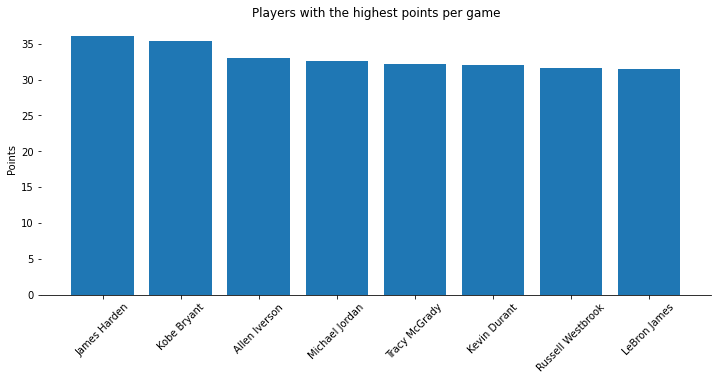

In [273]:
# We are gonna see which players have the highest points per game
highest_scoring = df[df['G'] > 70].sort_values('PTS', ascending=False).head(10)
plt.figure(figsize=(12,5))
plt.bar(x='Player', height='PTS', data=highest_scoring)
plt.xlabel('')
plt.ylabel('Points')
plt.title('Players with the highest points per game')
plt.xticks(rotation=45)
#plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

**Observation:**
- We can see that James Harden and Kobe Bryant have the highest point per game  

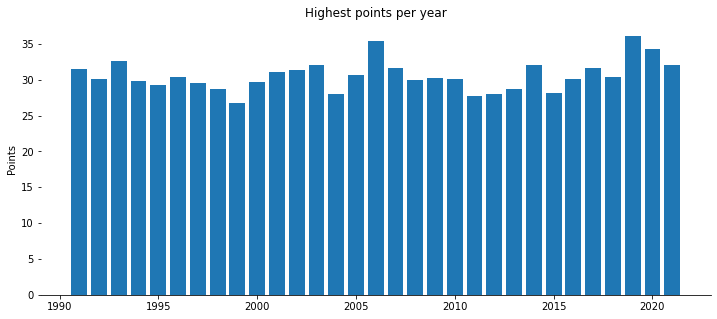

In [276]:
# Highest scoring by year
highest_score_by_year = df.groupby('Year').apply(lambda x: x.sort_values('PTS', ascending=False).head(1))
plt.figure(figsize=(12, 5))
plt.bar(x='Year', height='PTS', data=highest_score_by_year)
plt.xlabel('')
plt.ylabel('Points')
plt.title('Highest points per year')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

**Observation:**
- We can see that the highest score were in 2006 and in 2019 and in 2020.

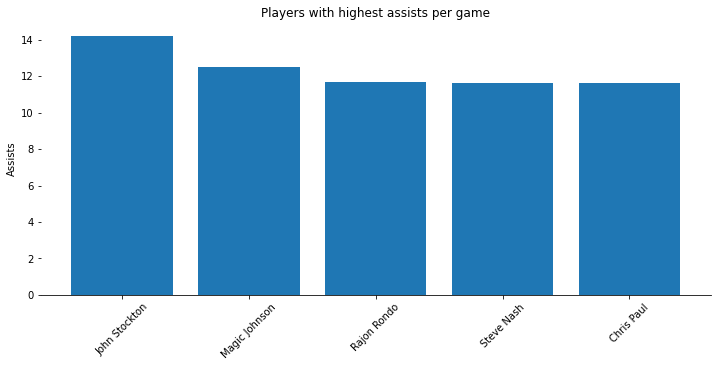

In [277]:
# players with the highest Assists per game
Assists_per_game = df[df['G'] > 70].sort_values("AST", ascending=False).head(10)
plt.figure(figsize=(12, 5))
plt.bar(x="Player", height='AST', data= Assists_per_game)
plt.xlabel("")
plt.ylabel('Assists')
plt.title('Players with highest assists per game')
plt.xticks(rotation=45)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

**Observation:**
- We can see that the players with the highest asists per game are John Stockton and Magic Johnson.

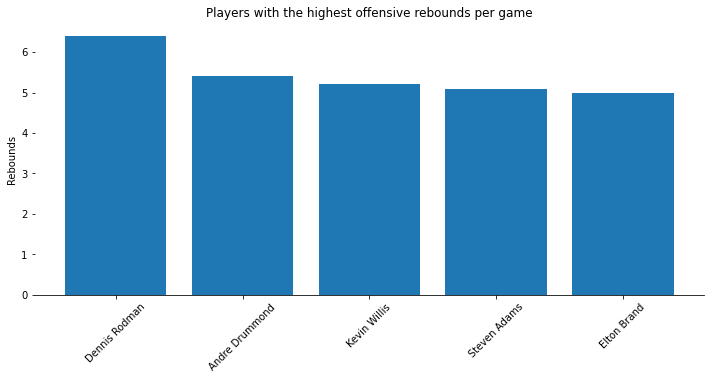

In [281]:
# Players with the highest Offensive Rebounds Per Game
offensive_reb_per_game = df[df['G'] > 70].sort_values('ORB', ascending=False).head(10)
plt.figure(figsize=(12, 5))
plt.bar(x='Player', height='ORB', data=offensive_reb_per_game)
plt.xlabel('')
plt.ylabel('Rebounds')
plt.title('Players with the highest offensive rebounds per game')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

**Observation:**
- We can see that Dennis Rodman was the player with the highest offensive rebounds per game.

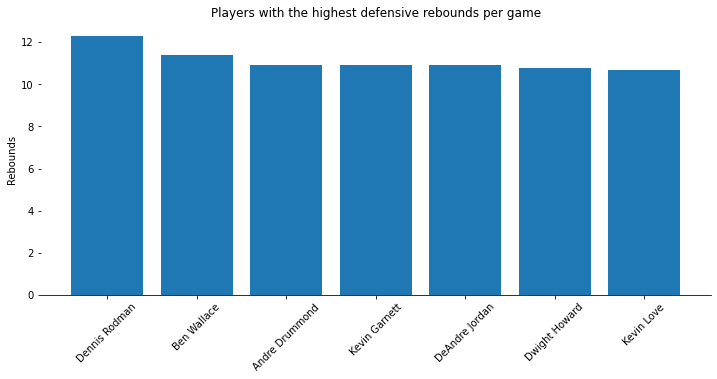

In [283]:
# Players with the highest Defensive Rebounds Per Game
defen_rebounds_per_game = df[df['G'] > 70].sort_values("DRB", ascending=False).head(10)
plt.figure(figsize=(12, 5))
plt.bar(x='Player', height='DRB', data=defen_rebounds_per_game)
plt.xlabel('')
plt.ylabel('Rebounds')
plt.title('Players with the highest defensive rebounds per game')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**Observation:**
- We can see that Dennis Rodman was the player with the highest defensive rebounds per game.

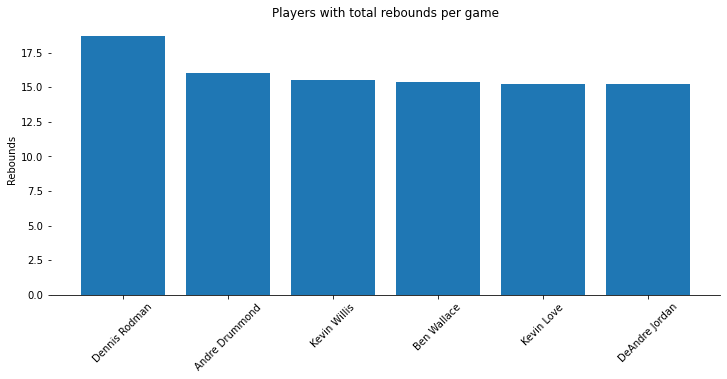

In [300]:
# Total Rebounds Per Game
total_reb_per_game = df[df['G'] > 70].sort_values('TRB', ascending=False).head(10)
plt.figure(figsize=(12, 5))
plt.bar(x='Player', height='TRB', data=total_reb_per_game)
plt.xlabel('')
plt.ylabel('Rebounds')
plt.title('Players with total rebounds per game')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

**Observation:**
- We can see that Dennis Rodman had the highest total rebounds per game.

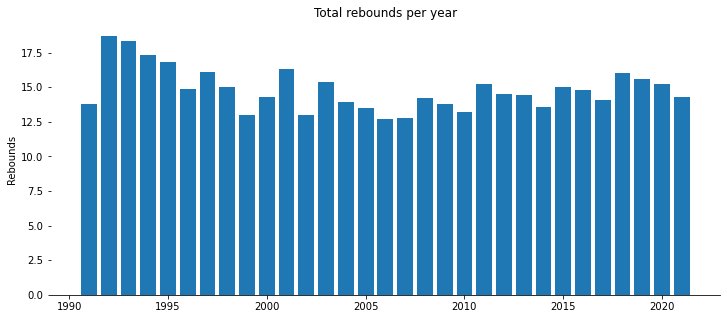

In [302]:
highest_rebound_by_year  = df.groupby('Year').apply(lambda x: x.sort_values('TRB', ascending=False).head(1))
plt.figure(figsize=(12, 5))
plt.bar(x='Year', height='TRB', data=highest_rebound_by_year)
plt.title('Total rebounds per year')
plt.xlabel('')
plt.ylabel('Rebounds')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

**Observation:**
- We can see that in 1992, 1993 and 1994 were the years where players made more rebounds during the games.

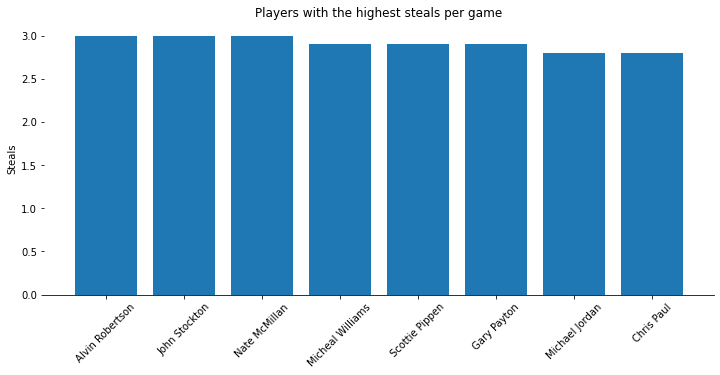

In [308]:
# Steals Per Game
steal_per_game = df[df['G'] > 70].sort_values('STL', ascending=False).head(10)
plt.figure(figsize=(12, 5))
plt.bar(x='Player', height='STL', data=steal_per_game)
plt.title('Players with the highest steals per game')
plt.xlabel('')
plt.ylabel('Steals')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

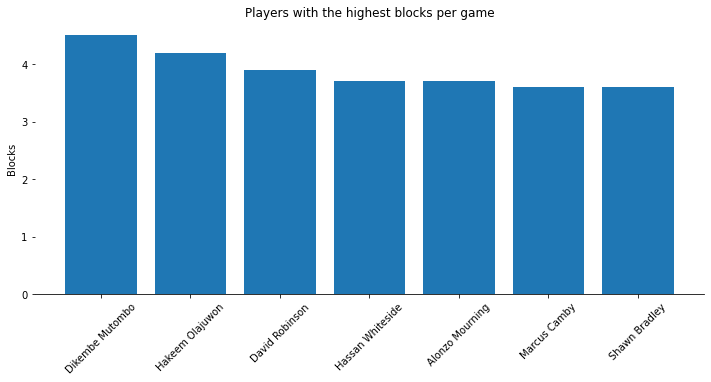

In [309]:
# Blocks Per Game
block_per_game = df[df['G'] > 70].sort_values('BLK', ascending=False).head(10)
plt.figure(figsize=(12, 5))
plt.bar(x='Player', height='BLK', data=block_per_game)
plt.title('Players with the highest blocks per game')
plt.xlabel('')
plt.ylabel('Blocks')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

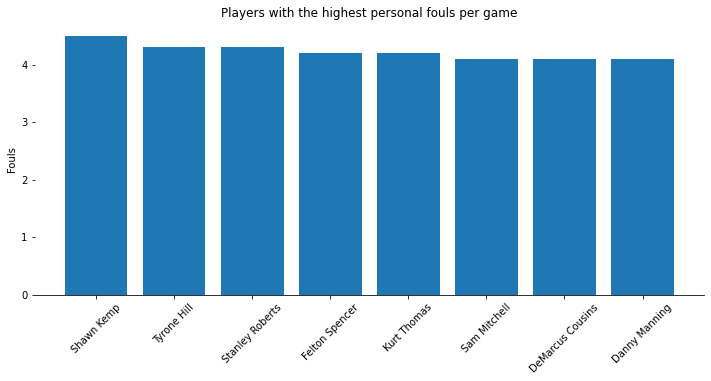

In [310]:
# PF -- Personal Fouls Per Game
p_fouls_per_game = df[df['G'] > 70].sort_values('PF', ascending=False).head(10)
plt.figure(figsize=(12, 5))
plt.bar(x='Player', height='PF', data=p_fouls_per_game)
plt.title('Players with the highest personal fouls per game')
plt.xlabel('')
plt.ylabel('Fouls')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

> ### Part IV: Maching Learning: Predicting the NBA MVP

In [1]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv('data.csv')
# Drop unnamed column
del df['Unnamed: 0']
# Checking on missing values
df.isna().sum()
#df.head()

Player        0
Pos           0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%          50
3P            0
3PA           0
3P%        2042
2P            0
2PA           0
2P%          84
eFG%         50
FT            0
FTA           0
FT%         462
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
Team          0
W             0
L             0
W/L%          0
GB            0
PS/G          0
PA/G          0
SRS           0
dtype: int64

In [7]:
df[pd.isnull(df['3P%'])][['Player', '3PA']]

,Player,3PA
2,Elden Campbell,0.0
3,Irving Thomas,0.0
18,Jack Haley,0.0
20,Keith Owens,0.0
30,Benoit Benjamin,0.0
...,...,...
14061,Evan Eschmeyer,0.0
14062,Gheorghe Mureșan,0.0
14064,Jim McIlvaine,0.0
14070,Mark Hendrickson,0.0


In [8]:
df[pd.isnull(df['FT%'])][['Player', 'FTA']]

,Player,FTA
77,John Coker,0.0
92,Jason Sasser,0.0
103,Adrian Caldwell,0.0
119,Bruno Šundov,0.0
158,Jamal Robinson,0.0
...,...,...
13951,Mark McNamara,0.0
13979,Luke Zeller,0.0
14032,Myron Brown,0.0
14054,Malcolm Lee,0.0


In [9]:
# Replace nan values by 0
df = df.fillna(0)
df.isna().sum()

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%        0
2P         0
2PA        0
2P%        0
eFG%       0
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Year       0
Pts Won    0
Pts Max    0
Share      0
Team       0
W          0
L          0
W/L%       0
GB         0
PS/G       0
PA/G       0
SRS        0
dtype: int64

In [10]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')

In [11]:
predictors = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
              '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
              'TOV', 'PF', 'PTS', 'Year', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS']


In [12]:
# We are gonna split our dataset into train and test
train = df[df['Year'] < 2021]
test = df[df['Year'] == 2021]

In [13]:
reg = Ridge(alpha = .1)

In [14]:
reg.fit(train[predictors], train['Share'])

Ridge(alpha=0.1)

In [25]:
predictions = reg.predict(test[predictors])
predictions = pd.DataFrame(predictions, columns=['predictions'], index=test.index)

In [26]:
combination = pd.concat([test[['Player', 'Share']], predictions], axis=1)
combination

,Player,Share,predictions
630,Aaron Gordon,0.0,0.013567
631,Austin Rivers,0.0,-0.013756
632,Bol Bol,0.0,0.002414
633,Facundo Campazzo,0.0,-0.004421
634,Greg Whittington,0.0,0.010734
...,...,...,...
13897,Patty Mills,0.0,-0.012571
13898,Quinndary Weatherspoon,0.0,-0.011575
13899,Rudy Gay,0.0,0.016424
13900,Tre Jones,0.0,-0.020434


In [27]:
combination.sort_values('Share', ascending=False).head(10)

,Player,Share,predictions
641,Nikola Jokić,0.961,0.154306
8624,Joel Embiid,0.580,0.162713
3651,Stephen Curry,0.449,0.142386
9907,Giannis Antetokounmpo,0.345,0.207436
1389,Chris Paul,0.138,0.072293
10997,Luka Dončić,0.042,0.151430
7464,Damian Lillard,0.038,0.116303
3536,Julius Randle,0.020,0.088877
3531,Derrick Rose,0.010,0.033001
11358,Rudy Gobert,0.008,0.095350


In [28]:
# Error metric
mean_squared_error(combination['Share'], combination["predictions"])

0.002666896001382854

In [29]:
combination['Share'].value_counts()

0.000    525
0.001      3
0.042      1
0.580      1
0.038      1
0.449      1
0.008      1
0.961      1
0.345      1
0.010      1
0.003      1
0.020      1
0.138      1
0.005      1
Name: Share, dtype: int64

In [30]:
actual = combination.sort_values('Share', ascending=False)
combination['Rk'] = list(range(1, combination.shape[0] + 1))
combination.head(10)

,Player,Share,predictions,Rk
630,Aaron Gordon,0.0,0.013567,1
631,Austin Rivers,0.0,-0.013756,2
632,Bol Bol,0.0,0.002414,3
633,Facundo Campazzo,0.0,-0.004421,4
634,Greg Whittington,0.0,0.010734,5
635,JaMychal Green,0.0,-0.004240,6
636,JaVale McGee,0.0,0.013357,7
637,Jamal Murray,0.0,0.042044,8
638,Markus Howard,0.0,-0.001333,9
639,Michael Porter Jr.,0.0,0.054226,10


In [31]:
combination = combination.sort_values('predictions', ascending=False)
combination['Prediction_RK'] = list(range(1, combination.shape[0] + 1))
combination.head(10)

,Player,Share,predictions,Rk,Prediction_RK
9907,Giannis Antetokounmpo,0.345,0.207436,351,1
8624,Joel Embiid,0.580,0.162713,315,2
641,Nikola Jokić,0.961,0.154306,12,3
10997,Luka Dončić,0.042,0.151430,389,4
3736,LeBron James,0.001,0.147512,151,5
3651,Stephen Curry,0.449,0.142386,139,6
4177,Kevin Durant,0.000,0.141350,185,7
4174,James Harden,0.001,0.140598,182,8
11784,Zion Williamson,0.000,0.127926,466,9
3876,Russell Westbrook,0.005,0.120227,173,10


In [32]:
combination.sort_values('Share', ascending=False).head(10)

,Player,Share,predictions,Rk,Prediction_RK
641,Nikola Jokić,0.961,0.154306,12,3
8624,Joel Embiid,0.580,0.162713,315,2
3651,Stephen Curry,0.449,0.142386,139,6
9907,Giannis Antetokounmpo,0.345,0.207436,351,1
1389,Chris Paul,0.138,0.072293,58,33
10997,Luka Dončić,0.042,0.151430,389,4
7464,Damian Lillard,0.038,0.116303,257,12
3536,Julius Randle,0.020,0.088877,113,24
3531,Derrick Rose,0.010,0.033001,108,76
11358,Rudy Gobert,0.008,0.095350,429,19


In [37]:
def find_ap(combination):
    actual = combination.sort_values('Share', ascending=False).head(5)
    predicted = combination.sort_values('predictions', ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row['Player'] in actual['Player'].values:
            found += 1
            ps.append(found/seen)
        seen += 1
    return sum(ps) / len(ps)

In [38]:
find_ap(combination)

0.7636363636363636

In [45]:
# Implementing backtesting to predict each year
years = list(range(1991, 2022))
aps = []
all_predictions = []
for year in years[5:]:
    train = df[df['Year'] < year]
    test = df[df['Year'] == year]
    reg.fit(train[predictors], train['Share'])
    predictions = reg.predict(test[predictors])
    predictions = pd.DataFrame(predictions, columns=['predictions'], index=test.index)
    combination = pd.concat([test[['Player', 'Share']], predictions], axis=1)
    all_predictions.append(combination)
    aps.append(find_ap(combination))

In [46]:
sum(aps) / len(aps)

0.7112884360789578

In [62]:
def add_ranks(combination):
    combination = combination.sort_values("Share", ascending=False)
    combination['RK'] = list(range(1, combination.shape[0] + 1))
    combination = combination.sort_values('predictions', ascending=False)
    combination['Predicted_RK'] = list(range(1, combination.shape[0] + 1))
    combination['Diff'] = combination['RK'] - combination['Predicted_RK']
    return combination

In [66]:
ranking = add_ranks(all_predictions[1])
ranking[ranking["RK"] < 6].sort_values("Diff", ascending=False)

,Player,Share,predictions,RK,Predicted_RK,Diff
1600,Karl Malone,0.857,0.192318,1,2,-1
10524,Michael Jordan,0.832,0.167629,2,3,-1
908,Grant Hill,0.327,0.128646,3,6,-3
4682,Tim Hardaway,0.207,0.059984,4,20,-16
8248,Glen Rice,0.117,0.033110,5,53,-48


In [67]:
def backtest(df, model, year, predictors):
    years = list(range(1991, 2022))
    aps = []
    all_predictions = []
    for year in years[5:]:
        train = df[df['Year'] < year]
        test = df[df['Year'] == year]
        model.fit(train[predictors], train['Share'])
        predictions = reg.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns=['predictions'], index=test.index)
        combination = pd.concat([test[['Player', 'Share']], predictions], axis=1)
        combination = add_ranks(combination)
        all_predictions.append(combination)
        aps.append(find_ap(combination))
    return sum(aps) / len(aps), aps, pd.concat(all_predictions)

In [68]:
mean_ap, aps, all_predictions = backtest(df, reg, years[5:], predictors)

In [69]:
mean_ap

0.7112884360789578

In [72]:
# Diagnosing model performance
all_predictions[all_predictions['RK'] <= 5].sort_values('Diff').head(10)

,Player,Share,predictions,RK,Predicted_RK,Diff
1224,Jason Kidd,0.712,0.028210,2,52,-50
8248,Glen Rice,0.117,0.033110,5,53,-48
5175,Steve Nash,0.839,0.034100,1,45,-44
8516,Peja Stojaković,0.228,0.036270,4,38,-34
5193,Steve Nash,0.739,0.054129,1,34,-33
12726,Joakim Noah,0.258,0.046968,4,37,-33
3657,Chauncey Billups,0.344,0.052696,5,35,-30
1389,Chris Paul,0.138,0.072293,5,33,-28
5208,Steve Nash,0.785,0.074421,2,21,-19
4682,Tim Hardaway,0.207,0.059984,4,20,-16


In [76]:
pd.concat([pd.Series(reg.coef_), pd.Series(predictors)], axis=1).sort_values(0, ascending=False)

,0,1
13,0.070001,eFG%
18,0.035041,DRB
29,0.027125,W/L%
17,0.021610,ORB
10,0.016945,2P
21,0.011635,STL
15,0.011351,FTA
22,0.011234,BLK
20,0.007455,AST
25,0.005894,PTS


In [77]:
# Adding more predictors
stat_ratios = df[['PTS', "AST", "STL", "BLK", "3P", 'Year']].groupby('Year').apply(lambda x: x/x.mean())

In [78]:
df[["PTS_T", "AST_R", "STL_R", "BLK_R", "3P_R"]] = stat_ratios = df[['PTS', "AST", "STL", "BLK", "3P"]]

In [79]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,PTS_T,AST_R,STL_R,BLK_R,3P_R
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,0.1,0.7,0.200,3.0,5.9,0.507,0.486,2.7,3.7,0.738,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73,9.1,0.9,0.7,0.3,0.1
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,0.9,2.7,0.324,5.2,10.1,0.517,0.510,1.4,1.8,0.797,0.7,2.3,3.0,2.2,1.2,0.3,1.0,1.8,14.5,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73,14.5,2.2,1.2,0.3,0.9
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,0.0,0.0,0.000,1.1,2.4,0.455,0.455,0.6,0.9,0.653,0.8,1.1,1.8,0.2,0.2,0.7,0.3,1.4,2.8,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73,2.8,0.2,0.2,0.7,0.0
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,0.0,0.0,0.000,0.7,1.9,0.340,0.340,0.5,0.8,0.571,0.5,0.7,1.2,0.4,0.2,0.0,0.5,0.9,1.8,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73,1.8,0.4,0.2,0.0,0.0
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,0.3,1.2,0.289,8.8,17.5,0.505,0.501,2.7,3.4,0.797,1.4,3.2,4.6,3.5,1.3,0.4,1.6,1.5,21.4,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73,21.4,3.5,1.3,0.4,0.3


In [80]:
# Adding more predictors
predictors += ["PTS_T", "AST_R", "STL_R", "BLK_R", "3P_R"]

In [90]:
mean_ap, aps, all_predictions = backtest(df, reg, years[5:], predictors)

In [91]:
mean_ap

0.7112884360789578

In [86]:
df['NPos']  = df['Pos'].astype('category').cat.codes
df["NTm"] = df['Tm'].astype('category').cat.codes

In [88]:
# Using Random Forest model
rf = RandomForestRegressor(n_estimators=50, random_state=1, min_samples_split=5)

mean_ap, aps, all_predictions = backtest(df, rf, years[28:], predictors)

In [89]:
mean_ap

0.7444170501505507

In [93]:
mean_ap, aps, all_predictions = backtest(df, reg, years[28:], predictors)
mean_ap

0.7112884360789578

**Observation:**
- We can see that the RandomForestRegressor model had a better performance 74% than Ridge model with 71%.